# Flight Prediction

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

from warnings import filterwarnings
filterwarnings('ignore')

## load data and info

In [2]:
train_data = pd.read_excel("Data_Train.xlsx")
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## missing values

In [4]:
train_data.isnull().sum()
#few missing values in route and total stops, we can drop them

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data[train_data["Total_Stops"].isnull()]
#this row has missing values in route and total stops

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [6]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## data preprocessing
we will change the date_of_journey to three columns day, month and year

In [7]:
data = train_data.copy()
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [9]:
def change_into_DateTime(col):
    data[col] = pd.to_datetime(data[col])

In [10]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_DateTime(feature)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [12]:
data['Journey_Day'] = data['Date_of_Journey'].dt.day
data['Journey_Month'] = data['Date_of_Journey'].dt.month
data['Journey_Year'] = data['Date_of_Journey'].dt.year
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-28 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-28 05:50:00,2024-01-28 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [13]:
def extract_hour_minute(df,col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_minute'] = df[col].dt.minute

In [14]:
for feature in ['Dep_Time', 'Arrival_Time']:
    extract_hour_minute(data,feature)

In [15]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-28 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-28 05:50:00,2024-01-28 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [16]:
cols = ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']
data.drop(columns=cols,inplace=True)
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


## data analysis

In [17]:
def flight_dep_time(x):
    if(x > 4 and x <= 8):
        return 'Early Morning'
    elif(x > 8 and x <=12):
        return 'Morning'
    elif(x >12 and x <= 16):
        return 'Afternoon'
    elif(x > 16 and x <= 20):
        return 'Evening'
    elif(x > 20 and x <= 24):
        return 'Night'
    else:
        return 'Late Night'


<Axes: xlabel='Dep_Time_hour'>

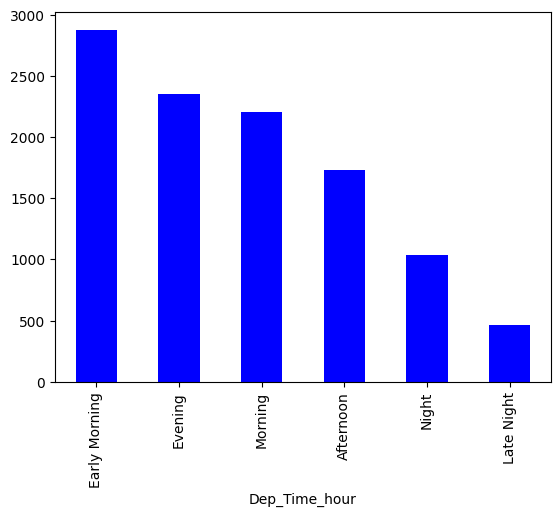

In [18]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar', color='blue')

In [19]:
#we are gonna change the Duration string to have hh mm format
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    return x

In [20]:
data['Duration'] = data['Duration'].apply(preprocess_duration)
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [21]:
#now we will split the duration into hours and minutes columns
data['Duration_Hours'] = data['Duration'].apply(lambda x: x.split(' ')[0][0:-1]).astype(int)
data['Duration_Minutes'] = data['Duration'].apply(lambda x: x.split(' ')[1][0:-1]).astype(int)

In [22]:
data['Duration_Total_Minutes'] = data['Duration'].str.replace('h', '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

<Axes: xlabel='Duration_Total_Minutes', ylabel='Price'>

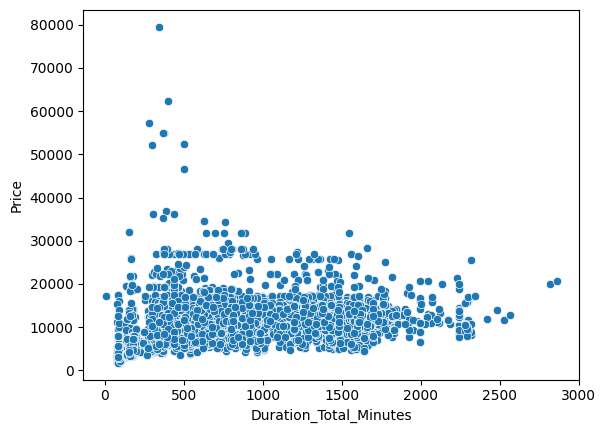

In [23]:
#We can see that the price doesnt depend on the duration of the flight
sns.scatterplot(x='Duration_Total_Minutes',y='Price',data=data)

<Axes: xlabel='Duration_Total_Minutes', ylabel='Price'>

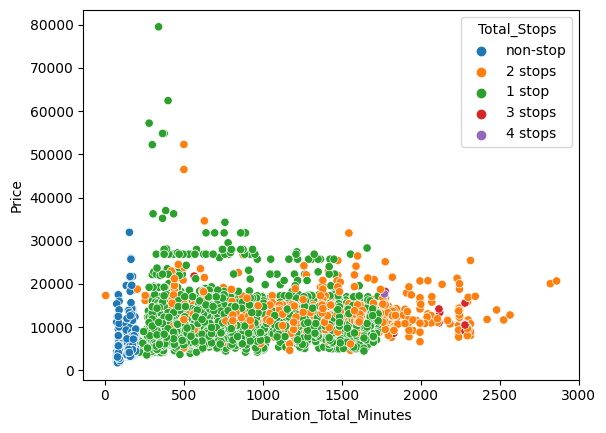

In [24]:
#Now we are gonna see if the price depends on the number of stops
sns.scatterplot(x='Duration_Total_Minutes',y='Price', hue='Total_Stops',data=data)

The blue area says that non-stop flights take less duration, while their fare is also low. As the stops increases, the duration of flight also increases and so does the fare (in some cases).

In [25]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

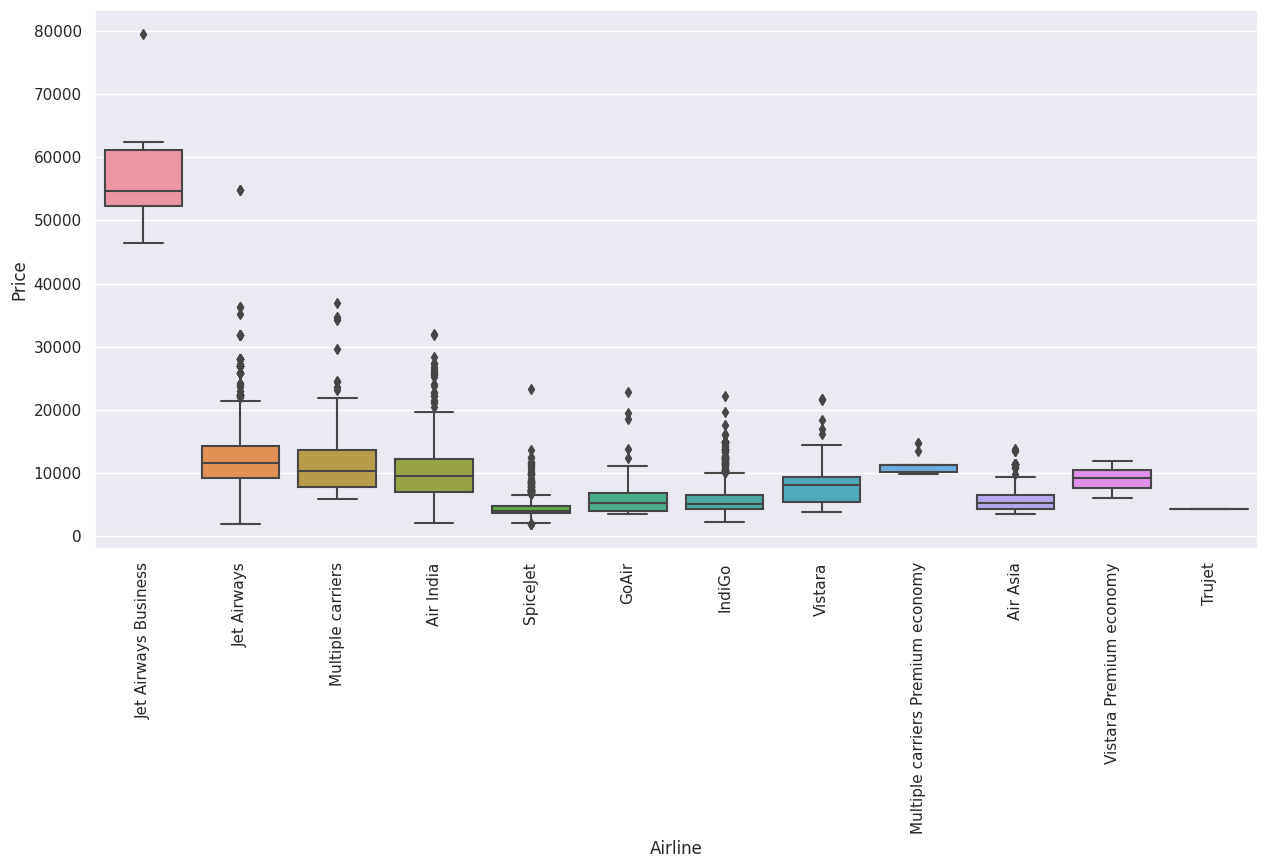

In [26]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation=90)
plt.show()

## Feature Engineering

In [27]:
#If we pass the feature that are strings to the model, it will not be able to understand it
#So we need to encode it
cat_col = [col for col in data.columns if data[col].dtype == 'object']

In [28]:
num_col = [col for col in data.columns if data[col].dtype != 'object']

In [29]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [30]:
#One Hot Encoding from scratch
for sub_category in data['Source'].unique():
    data['Source_'+ sub_category] = data['Source'].apply(lambda x: 1 if sub_category in x else 0)

data.head(2)


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,...,13,15,7,25,445,0,1,0,0,0


In [31]:
#Doing one-hot in duration doesnt make sense, cause we descomposed it earlier
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [32]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [33]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [34]:
airlines_dict = {k:i for i,k in enumerate(airlines,0)}
airlines_dict

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [35]:
data['Airline'] = data['Airline'].map(airlines_dict)
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,...,13,15,7,25,445,0,1,0,0,0


here we changed the strings in the airlines column to numbers, we changed the categorical data to numerical data. We have the reference of the airlines in the dictionary. 

In [36]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [37]:
data['Destination'].replace({'New Delhi':'Delhi'},inplace=True)
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [38]:
destination = data.groupby(['Destination'])['Price'].mean().sort_values().index
destination_dict = {k:i for i,k in enumerate(destination,0)}
destination_dict

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [39]:
data['Destination'] = data['Destination'].map(destination_dict)
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,...,13,15,7,25,445,0,1,0,0,0


In [40]:
data['Total_Stops'].unique()
#This is ordinal data, so we can use label encoding

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [41]:
stop = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
data['Total_Stops'] = data['Total_Stops'].map(stop)
data.head(2)



,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,...,13,15,7,25,445,0,1,0,0,0


In [44]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [53]:
#The total stops and Route are related to each other, so we can drop one of them
#One is the number of stops and the other is the route

In [54]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Journey_Year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_Hours', 'Duration_Minutes',
       'Duration_Total_Minutes', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [55]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,...,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,3,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,...,13,15,7,25,445,0,1,0,0,0


In [56]:
data.drop(columns=['Additional_Info', 'Source', 'Duration_Total_Minutes', 'Journey_Year'],axis= 1, inplace=True)

In [57]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_Hours',
       'Duration_Minutes', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [58]:
data.drop(columns=['Route', 'Duration'],axis= 1, inplace=True)
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_Hours,Duration_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


## Outlier Detection

In [77]:
def plot (df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)
    sns.distplot(df[col], ax=ax1)
    #make the boxplot horizontal
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)



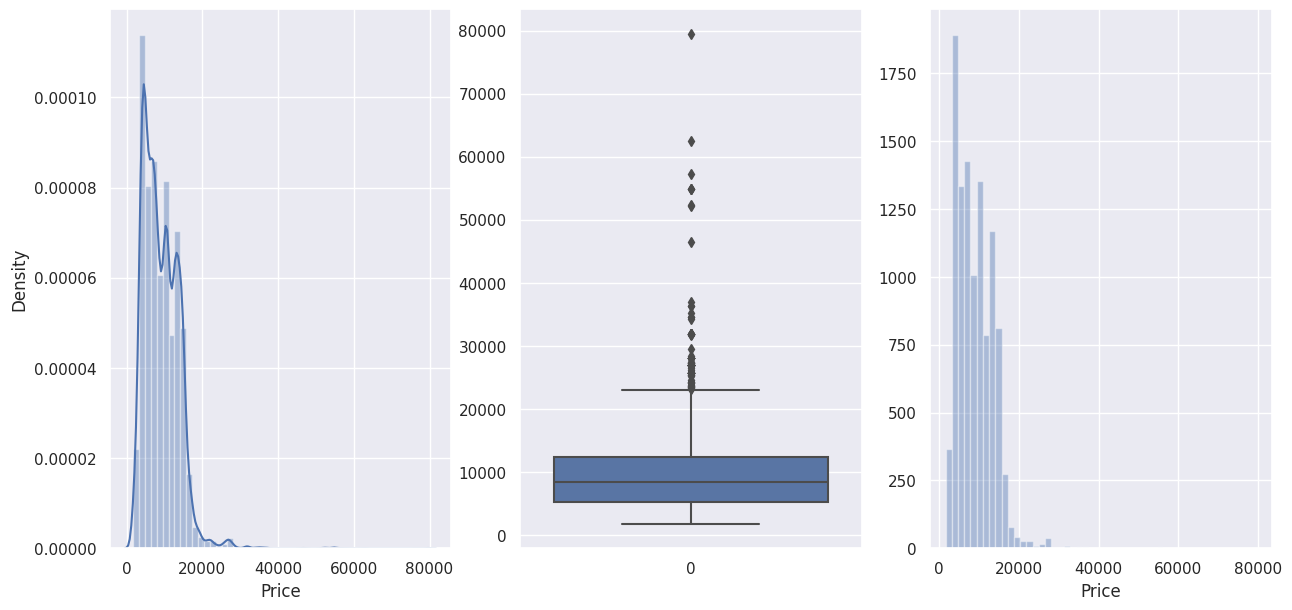

In [78]:
plot(data, 'Price')

We can see that there are some outliers in the data. We will remove them using the IQR method, because is right skewed.

In [82]:
q3 = data['Price'].quantile(0.75)
q1 = data['Price'].quantile(0.25)
iqr = q3 - q1
maximum_value = q3 + 1.5*iqr
minimum_value = q1 - 1.5*iqr

In [89]:
print("Total outliers")
len([price for price in data['Price']
    if price > maximum_value or price < minimum_value])


Total outliers


94

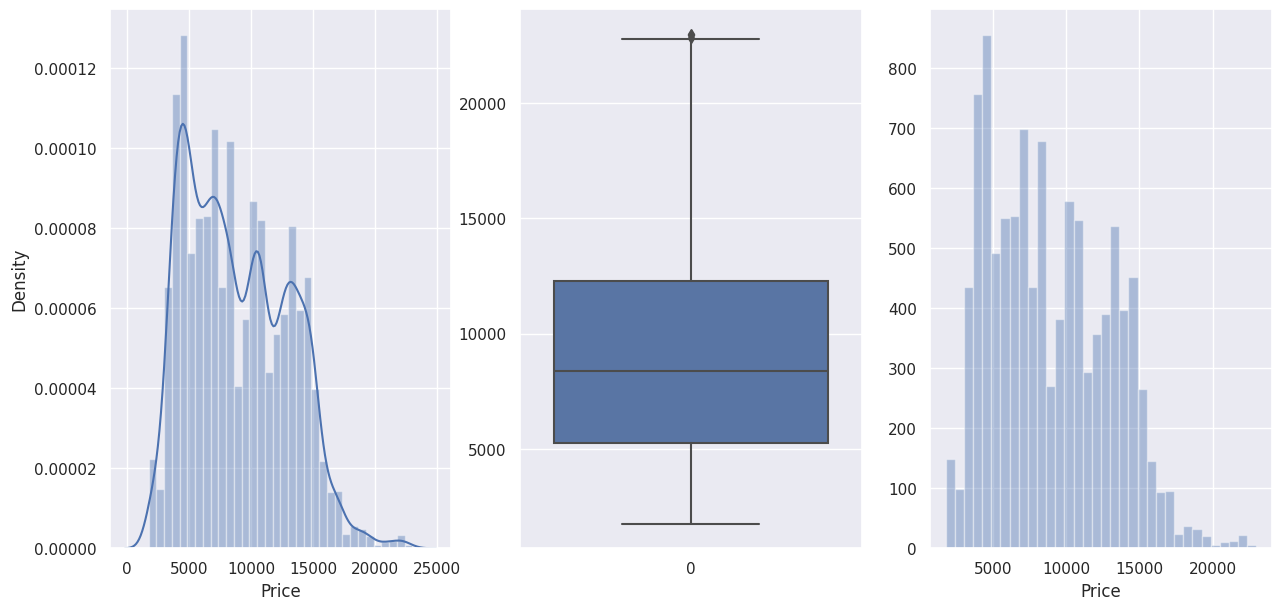

In [91]:
#change the outliers to the median
data['Price'] = np.where(data['Price'] > maximum_value, data['Price'].median(), data['Price'])
data['Price'] = np.where(data['Price'] < minimum_value, data['Price'].median(), data['Price'])
plot(data, 'Price')

## Feature Selection

In [94]:
X = data.drop(columns=['Price'],axis=1)
Y = data['Price']

In [96]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X,Y)
mutual_info

array([0.97098884, 1.00121652, 0.80197296, 0.22761831, 0.62687912,
       0.34132883, 0.25554445, 0.39567726, 0.33448641, 0.46305467,
       0.33123468, 0.38370365, 0.4602687 , 0.52195786, 0.1262677 ,
       0.19703541])

In [97]:
pd.DataFrame(mutual_info, index=X.columns).sort_values(by=0,ascending=False)

,0
Destination,1.001217
Airline,0.970989
Total_Stops,0.801973
Journey_Month,0.626879
Source_Delhi,0.521958
Duration_Hours,0.463055
Source_Kolkata,0.460269
Arrival_Time_hour,0.395677
Source_Banglore,0.383704
Dep_Time_hour,0.341329
